In [1]:
#!pip install iso3166
#!pip install nltk
#!pip install wordcloud

In [2]:
import pandas as pd
import matplotlib as plt
from collections import Counter
from iso3166 import countries
import nltk
from nltk import pos_tag, word_tokenize
from nltk.collocations import *
import re
import csv
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
job_data_raw = pd.read_csv('linkedin_data1000',index_col=0)

In [4]:
job_data = job_data_raw

In [5]:
job_data

,Date,Company,Title,Location,Description,Level,Link
ID,,,,,,,
1,2021-09-07,XAD Technologies LLC,Nokia Project Coordinator-DWDM/WDM,"Dubai, Emiratos Árabes Unidos",Enviar mensaje directo al anunciante de XAD Te...,Jornada completa,https://ae.linkedin.com/jobs/view/nokia-projec...
2,2021-08-28,XAD Technologies LLC,DWDM Engineer,"Dubai, Emiratos Árabes Unidos",Enviar mensaje directo al anunciante de XAD Te...,Jornada completa,https://ae.linkedin.com/jobs/view/dwdm-enginee...
3,2021-09-01,MTN GlobalConnect,Project Manager Fibre Projects,"Kampala, Uganda",Mission/ Core Purpose of the Job The Proje...,Intermedio,https://ug.linkedin.com/jobs/view/project-mana...
4,2021-09-10,ZTE Deutschland GmbH,Project Director-DWDM (m/w/d),Dusseldorf y alrededores,Project Director - DWDM(m/w/d) Location: D...,Ejecutivo,https://de.linkedin.com/jobs/view/project-dire...
5,2021-08-16,Huawei,Fixed Network Product Manager (DWDM),"Territorio Federal de Kuala Lumpur, Malasia",Enviar mensaje directo al anunciante de Huawei...,Intermedio,https://my.linkedin.com/jobs/view/fixed-networ...
...,...,...,...,...,...,...,...
995,2021-08-18,General Dynamics Information Technology,Network Architect - TS/SCI with Poly,"McLean, Virginia, Estados Unidos",Rango de sueldo estimado El sueldo real puede...,NaN,https://www.linkedin.com/jobs/view/network-arc...
996,2021-08-19,Crown Castle,NOC Technician,"Melville, Nueva York, Estados Unidos",Rango de sueldo estimado ...,NaN,https://www.linkedin.com/jobs/view/noc-technic...
997,2021-08-24,Spectrum,Fiber Technician,"Green Bay, Wisconsin, Estados Unidos","Job Summary Under minimal supervision, repair...",Sin experiencia,https://www.linkedin.com/jobs/view/fiber-techn...


In [6]:
job_data.groupby(['Company']).count().sort_values('Date',ascending=False).head(10)

,Date,Title,Location,Description,Level,Link
Company,,,,,,
Crown Castle,34,34,34,34,22,34
Ciena,32,32,32,32,28,32
Nokia,25,25,25,25,21,25
Microsoft,24,24,24,24,23,24
Spectrum,24,24,24,24,24,24
Lumen Technologies,23,23,23,23,19,23
Amazon Web Services (AWS),22,22,22,22,22,22
Zayo Group,18,18,18,18,11,18
BT,17,17,17,17,16,17


In [7]:
job_data.groupby(['Location']).count().sort_values('Date',ascending=False).head(10)

,Date,Company,Title,Description,Level,Link
Location,,,,,,
"Singapur, Singapur",49,49,49,49,49,49
"Dublín, Dublín, Irlanda",18,18,18,18,14,18
"Seattle, Washington, Estados Unidos",17,17,17,17,13,17
"Sydney, Nueva Gales del Sur, Australia",16,16,16,16,16,16
"Londres, Inglaterra, Reino Unido",14,14,14,14,14,14
"Tokio, Japón",14,14,14,14,14,14
"Dallas, Texas, Estados Unidos",14,14,14,14,8,14
"Bengaluru, Karnataka, India",13,13,13,13,13,13
"Washington, Distrito de Columbia, Estados Unidos",13,13,13,13,11,13


In [8]:
print(job_data['Date'].min())
print(job_data['Date'].max())

2021-03-01
2021-09-13


In [9]:
#Clening of \n caracter in Level categories
job_data['Level'] = job_data['Level'].str.replace('\n','')
job_data['Level'] = job_data['Level'].str.strip()

In [10]:
job_data.groupby(['Level']).count().sort_values('Date',ascending=False)

,Date,Company,Title,Location,Description,Link
Level,,,,,,
Sin experiencia,260,260,260,260,260,260
Algo de responsabilidad,198,198,198,198,198,198
No corresponde,195,195,195,195,195,195
Intermedio,182,182,182,182,182,182
Jornada completa,31,31,31,31,31,31
Director,16,16,16,16,16,16
Prácticas,4,4,4,4,4,4
Contrato por obra,2,2,2,2,2,2
Ejecutivo,2,2,2,2,2,2


### Job Descriptions

In [13]:
# Merge of all descriptions in one list 
descriptions = " ".join(job_data['Description'].tolist()) #texto plano

In [14]:
# Delete stopwords in english and spanish
stopwords_en = []
stopwords_en = nltk.corpus.stopwords.words('english')
stopwords_es = []
stopwords_es = nltk.corpus.stopwords.words('spanish')
stopwords_gr = []
stopwords_gr = nltk.corpus.stopwords.words('german')
stopwords_it = []
stopwords_it = nltk.corpus.stopwords.words('italian')
stopwords_fr = []
stopwords_fr = nltk.corpus.stopwords.words('french')
stopwords_pt = []
stopwords_pt = nltk.corpus.stopwords.words('portuguese')

In [15]:
#stopwords = stopwords_en.extend(stopwords_es)
stopwords = stopwords_en + stopwords_es + stopwords_gr + stopwords_it + stopwords_fr + stopwords_pt + \
            ['network','dwdm','data','job','networking','software','make','van','race']
            
# for i in itertools.chain(stopwords_en,stopwords_es):
#     stopwords.append(i)
print(len(stopwords))

1373


In [16]:
description_tokens = []

#Eliminamos la palabra 'N/A' de la lista
tokens = re.sub(r"N/A", "", descriptions)

#Creamos la lista de tokens eliminando caracteres especiales
description_tokens_raw = word_tokenize(tokens.lower())


In [17]:
with open('techterms1.txt') as f:
    tech_terms_raw = f.readlines()

In [18]:
tech_terms = []
for term in tech_terms_raw:
    tech_terms.append(term.strip('\n').lower())

In [19]:
for word in description_tokens_raw:
    if word not in stopwords:
        #print(type(word))
        token_tmp = re.sub(r"[^a-zA-Z0-9áéíóúüÁÉÍÓÚÜ/-]",'',word.lower()) #Eliminamos caracteres especiales
        token_tmp = re.sub(r"\b[a-zA-Z0-9]\b", '',token_tmp) #Eliminamos palabras de una sola letra
        #token_tmp = word
        if token_tmp != '':  #Eliminamos palabras vacias
            if word in tech_terms:
                description_tokens.append(token_tmp)

In [20]:
len(description_tokens)

29270

In [21]:
from nltk import ngrams, FreqDist
all_counts = dict()
for size in 1, 2, 3, 4, 5:
    all_counts[size] = FreqDist(ngrams(description_tokens, size))

In [22]:
most_common_terms = all_counts[1].most_common(100)

In [23]:
dict_tuple_value = dict(most_common_terms)
dict_top100_terms = dict()
for key, value in dict_tuple_value.items():
    dict_top100_terms[key[0]] = dict_tuple_value[key]

In [24]:
with open('most_common_terms.csv', 'w') as f:  # You will need 'wb' mode in Python 2.x
    w = csv.DictWriter(f, all_counts[1].keys())
    w.writeheader()
    w.writerow(all_counts[1])

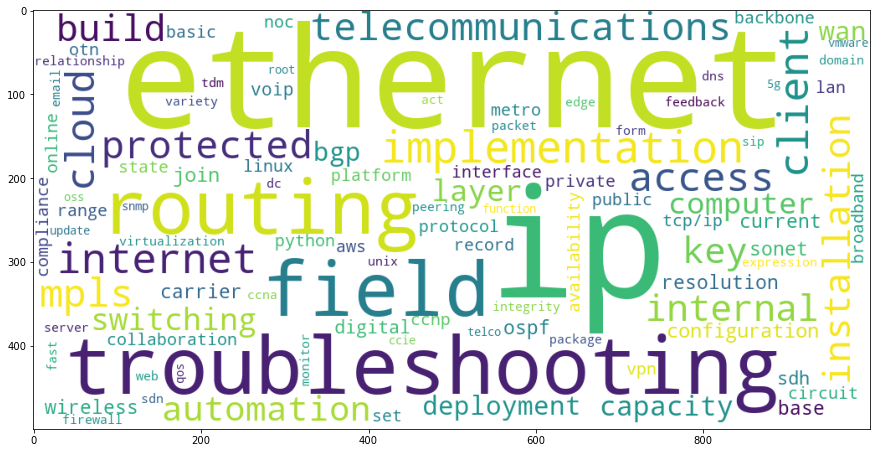

In [36]:
wordcloud = WordCloud(width = 1000, height = 500,background_color='white').generate_from_frequencies(dict_top100_terms)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)